In [2]:
import pandas as pd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_excel('./vnepress_data.xlsx')
df.head()

,URL,Date,Category,Title,Comment Count
0,https://vnexpress.net/buong-trung-da-nang-4428...,17/02/2022,Các bệnh,Buồng trứng đa nang,0
1,https://vnexpress.net/duong-nao-tu-nha-trang-d...,22/12/2024,Du lịch,Đường nào từ Nha Trang đi Đà Lạt qua đèo Ngoạn...,1
2,https://vnexpress.net/xet-xu-vu-ba-nguyen-thi-...,07/07/2024,Pháp luật,Xét xử vụ bà Nguyễn Thị Thanh Nhàn mua chuộc c...,3
3,https://vnexpress.net/trai-nghiem-da-nang-voi-...,13/12/2024,Du lịch,Trải nghiệm Đà Nẵng với 10.000 'hộ chiếu' ẩm thực,7
4,https://vnexpress.net/gia-dinh-o-hai-phong-boi...,25/06/2024,Thư giãn,Gia đình ở Hải Phòng bội thu vì cá tự tìm đến nhà,9


In [6]:
print(df['Category'].unique())

['Các bệnh' 'Du lịch' 'Pháp luật' 'Thư giãn' 'Thời sự' 'Thể thao' 'Xe'
 'Ý kiến' 'Giáo dục' 'Kinh doanh' 'Giải trí' 'Sức khỏe' 'Bất động sản'
 'Góc nhìn' 'Số hóa' 'Đời sống' 'Khoa học' 'Thế giới' 'Tâm sự'
 'No Category' 'Cholimex - Xèo xèo ngại gì chưa nấu']


In [7]:
# Xóa các dòng có giá trị 'No Category' và 'Cholimex - Xèo xèo ngại gì chưa nấu' trong cột 'Category'
df = df[~df['Category'].isin(['No Category', 'Cholimex - Xèo xèo ngại gì chưa nấu'])]

# Kiểm tra lại các giá trị trong cột 'Category' sau khi xóa
print(df['Category'].unique())


['Các bệnh' 'Du lịch' 'Pháp luật' 'Thư giãn' 'Thời sự' 'Thể thao' 'Xe'
 'Ý kiến' 'Giáo dục' 'Kinh doanh' 'Giải trí' 'Sức khỏe' 'Bất động sản'
 'Góc nhìn' 'Số hóa' 'Đời sống' 'Khoa học' 'Thế giới' 'Tâm sự']


<class 'pandas.core.frame.DataFrame'>
Index: 773 entries, 0 to 774
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   URL            773 non-null    object        
 1   Date           773 non-null    datetime64[ns]
 2   Category       773 non-null    object        
 3   Title          773 non-null    object        
 4   Comment Count  773 non-null    int64         
 5   Month          773 non-null    period[M]     
dtypes: datetime64[ns](1), int64(1), object(3), period[M](1)
memory usage: 42.3+ KB
None
                                                 URL       Date   Category  \
0  https://vnexpress.net/buong-trung-da-nang-4428... 2022-02-17   Các bệnh   
1  https://vnexpress.net/duong-nao-tu-nha-trang-d... 2024-12-22    Du lịch   
2  https://vnexpress.net/xet-xu-vu-ba-nguyen-thi-... 2024-07-07  Pháp luật   
3  https://vnexpress.net/trai-nghiem-da-nang-voi-... 2024-12-13    Du lịch   
4  https://vne

/var/folders/c4/zt34kfcn32sgz_0d16tjsg4m0000gn/T/ipykernel_71287/3277785936.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Comment Count', data=df, palette='muted', linewidth=1.5)


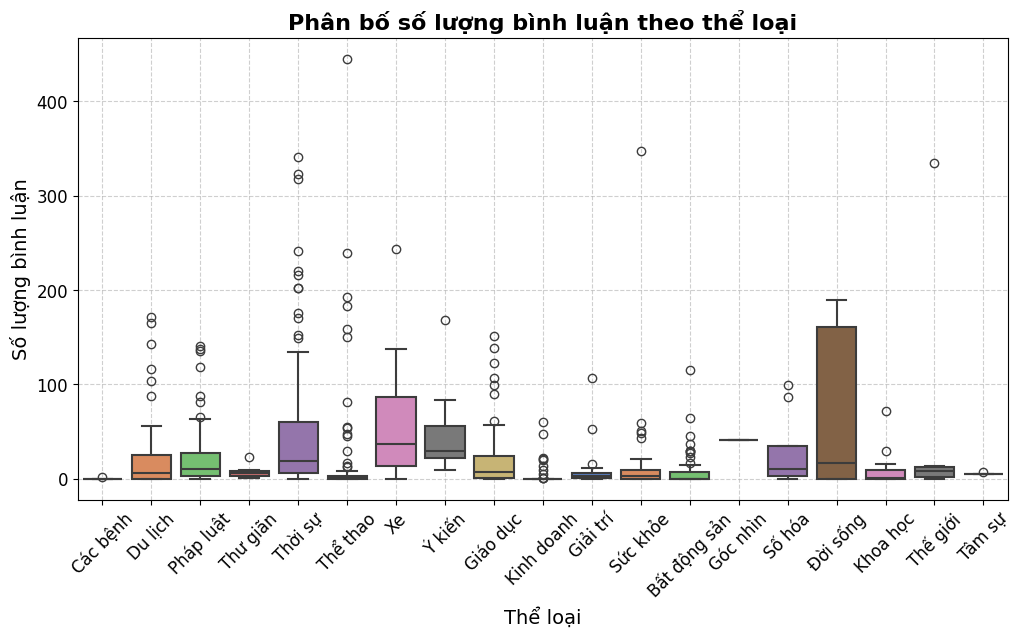

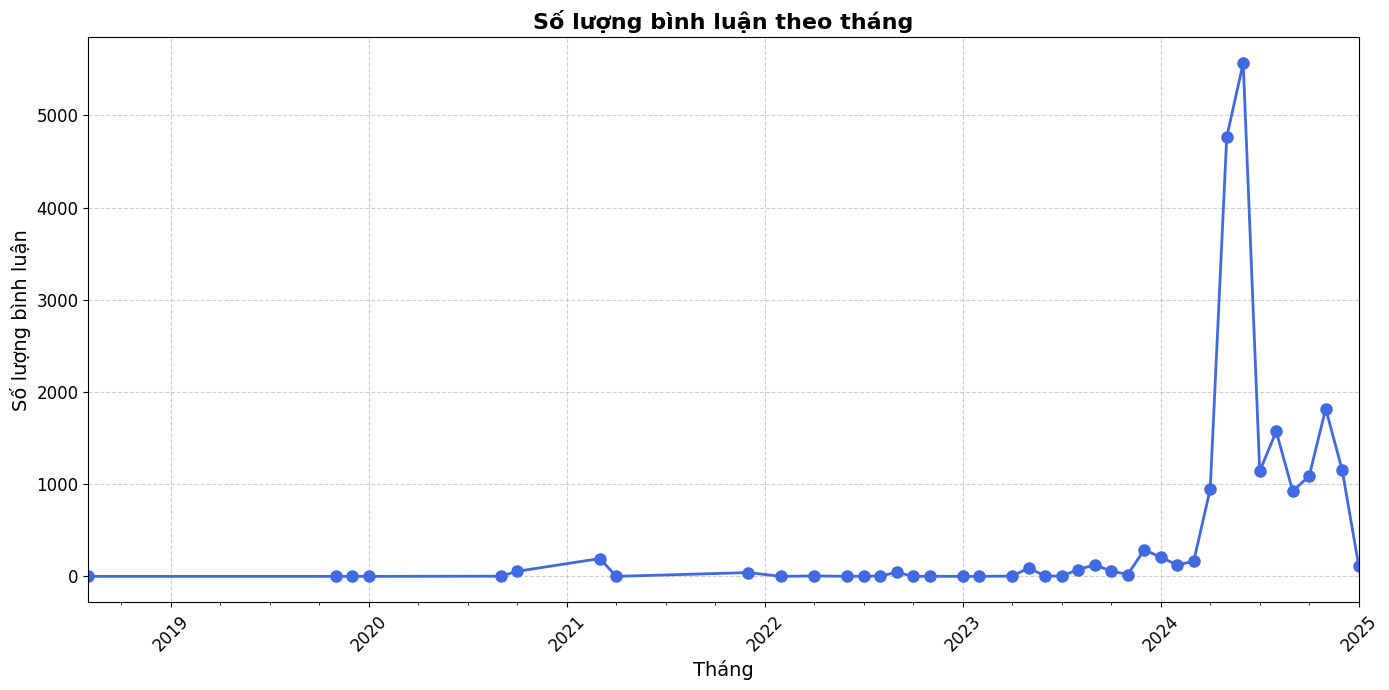

/var/folders/c4/zt34kfcn32sgz_0d16tjsg4m0000gn/T/ipykernel_71287/3277785936.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Comment Count', data=df, estimator='mean', palette='viridis', ci=None)
/var/folders/c4/zt34kfcn32sgz_0d16tjsg4m0000gn/T/ipykernel_71287/3277785936.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Comment Count', data=df, estimator='mean', palette='viridis', ci=None)


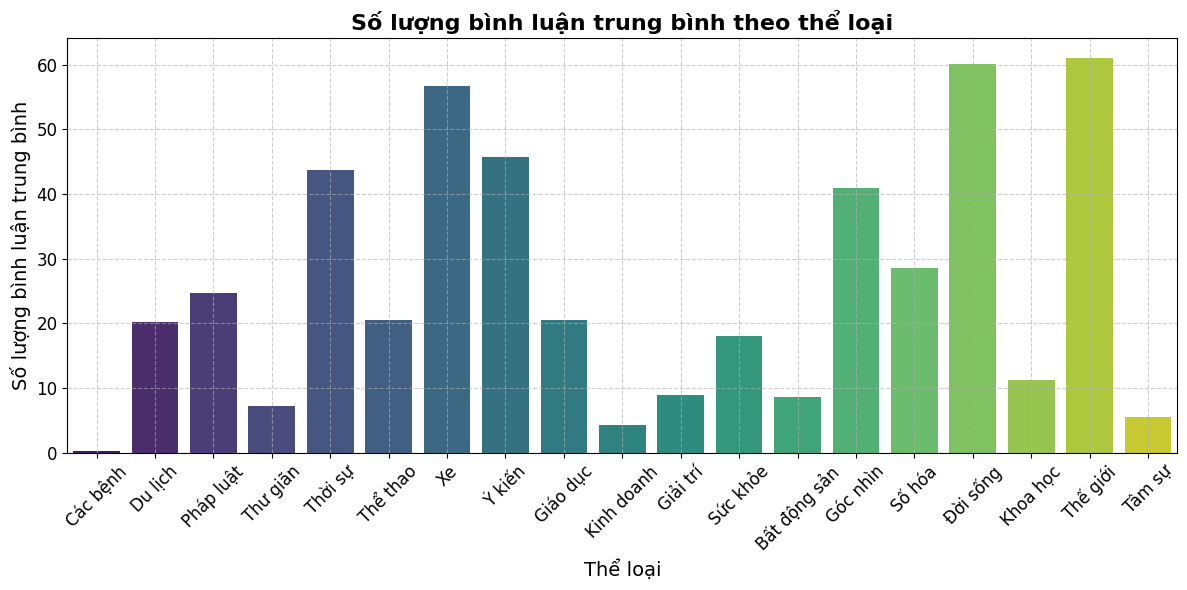

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử dữ liệu của bạn đã được đọc vào một DataFrame 'df'
# df = pd.read_csv('your_file.csv')

# 1. Khám phá tổng quan về dữ liệu
print(df.info())
print(df.head())

# 2. Chuyển đổi cột 'Date' thành kiểu datetime để dễ dàng phân tích
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# 3. Thống kê mô tả về số lượng bình luận
print(df['Comment Count'].describe())

# 4. Phân tích theo thể loại (Category)
category_counts = df['Category'].value_counts()
print(category_counts)

# Cải thiện biểu đồ phân bố số lượng bình luận theo thể loại
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Comment Count', data=df, palette='muted', linewidth=1.5)
plt.title('Phân bố số lượng bình luận theo thể loại', fontsize=16, weight='bold')
plt.xlabel('Thể loại', fontsize=14)
plt.ylabel('Số lượng bình luận', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. Phân tích theo thời gian (Ngày đăng)
df['Month'] = df['Date'].dt.to_period('M')  # Tạo cột tháng để phân tích

# Tính số lượng bình luận theo tháng
monthly_comments = df.groupby('Month')['Comment Count'].sum()

# Vẽ biểu đồ số lượng bình luận theo tháng
plt.figure(figsize=(14, 7))
monthly_comments.plot(kind='line', marker='o', color='royalblue', linewidth=2, markersize=8)
plt.title('Số lượng bình luận theo tháng', fontsize=16, weight='bold')
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Số lượng bình luận', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 6. Kiểm tra mối quan hệ giữa thể loại và số lượng bình luận (tạo biểu đồ phân bố)
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Comment Count', data=df, estimator='mean', palette='viridis', ci=None)
plt.title('Số lượng bình luận trung bình theo thể loại', fontsize=16, weight='bold')
plt.xlabel('Thể loại', fontsize=14)
plt.ylabel('Số lượng bình luận trung bình', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


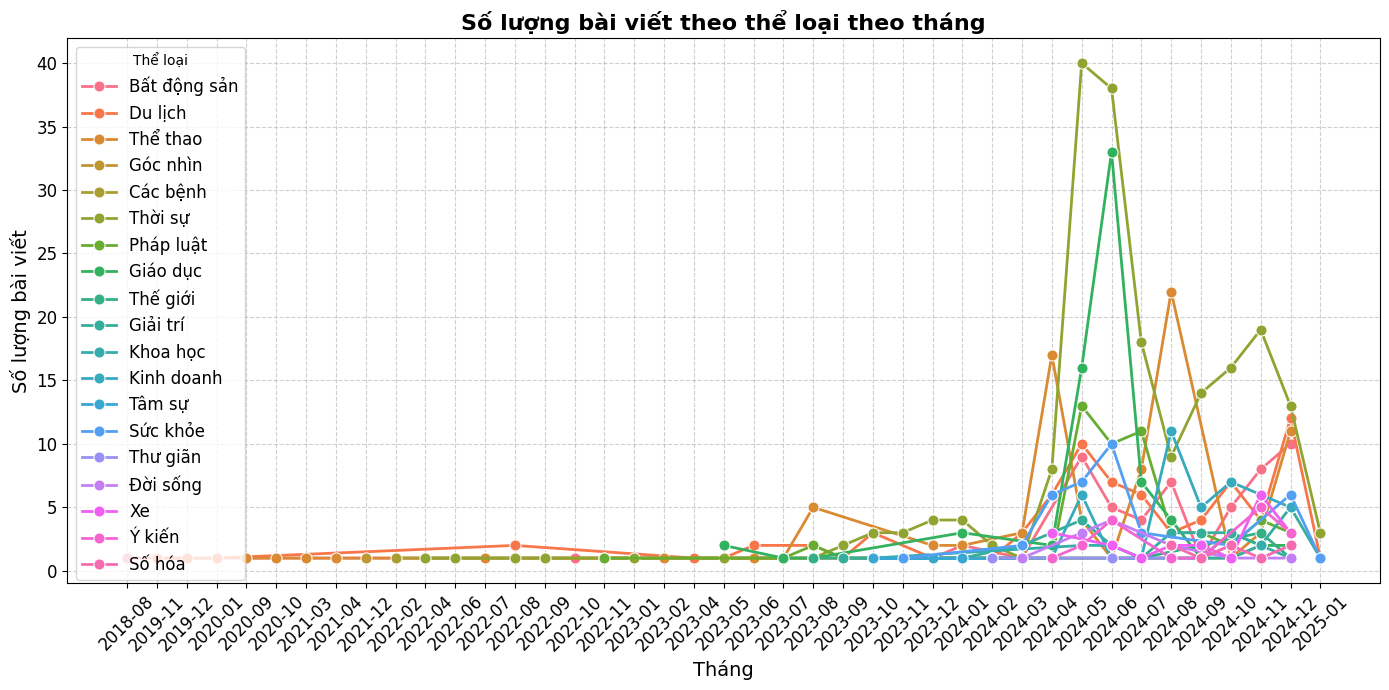

In [13]:
# Chuyển cột 'Month' thành kiểu chuỗi (string)
monthly_category_counts['Month'] = monthly_category_counts['Month'].astype(str)

# Vẽ lại biểu đồ thể loại báo theo tháng
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_category_counts, x='Month', y='Count', hue='Category', marker='o', linewidth=2, markersize=8)

# Thiết lập tiêu đề và nhãn trục
plt.title('Số lượng bài viết theo thể loại theo tháng', fontsize=16, weight='bold')
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Số lượng bài viết', fontsize=14)

# Chỉnh sửa nhãn trục x và y
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Thêm lưới nhẹ để dễ nhìn
plt.grid(True, linestyle='--', alpha=0.6)

# Thiết lập phần chú giải (legend)
plt.legend(title='Thể loại', fontsize=12)

# Cải thiện bố cục
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()


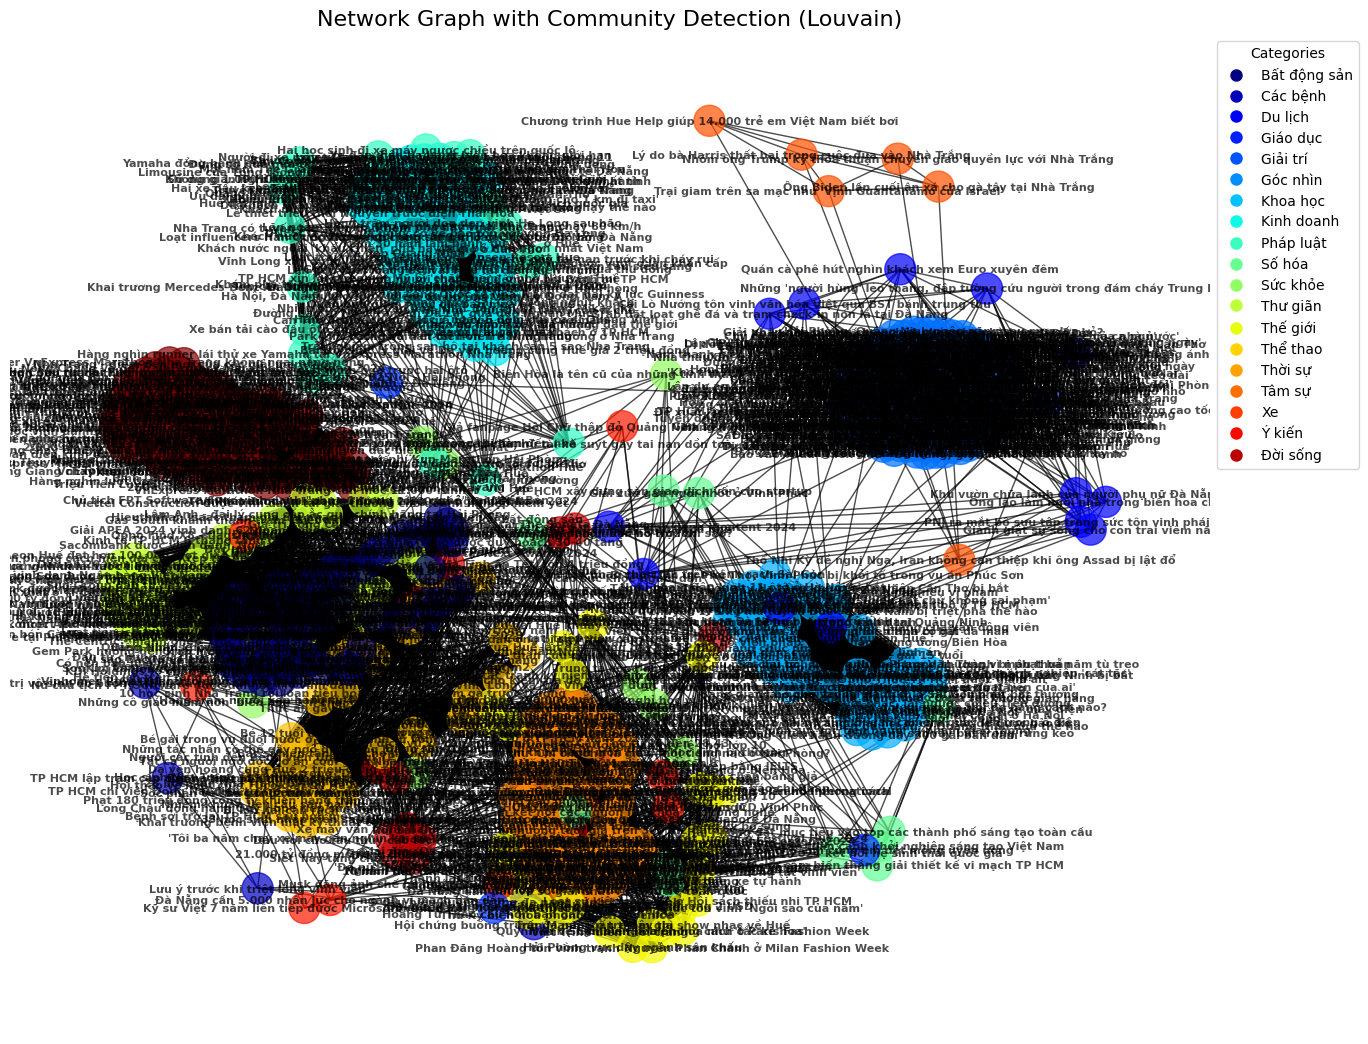

In [48]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import community as community_louvain  # hoặc sử dụng 'import community_louvain' nếu gặp lỗi

# Tạo đồ thị
G = nx.Graph()

# Xử lý giá trị thiếu trong Comment Count
df['Comment Count'] = df['Comment Count'].fillna(df['Comment Count'].median())

# Khởi tạo LabelEncoder và mã hóa Category thành Category Code
le = LabelEncoder()
df['Category Code'] = le.fit_transform(df['Category'])

# Kết nối các bài báo trong cùng một danh mục (loại bỏ các cạnh trùng lặp)
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        if df.iloc[i]['Category Code'] == df.iloc[j]['Category Code']:
            G.add_edge(df.iloc[i]['Title'], df.iloc[j]['Title'])

# Phân tích cộng đồng với thuật toán Louvain
partition = community_louvain.best_partition(G)

# Vẽ đồ thị với cộng đồng phân tách
plt.figure(figsize=(12, 10))

# Chọn màu sắc cho mỗi cộng đồng
colors = [partition[node] for node in G.nodes()]

# Vị trí các nút
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Vẽ đồ thị
nx.draw(G, pos, with_labels=True, node_size=500, node_color=colors, cmap=plt.cm.jet, font_size=8, font_weight='bold', alpha=0.7)

# Thêm chú thích (legend) cho từng cộng đồng (Category)
# Lấy tên category tương ứng từ label encoder
category_labels = dict(zip(range(len(le.classes_)), le.classes_))

# Tạo một legend với các category
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.jet(i / len(le.classes_)), markersize=10) for i in range(len(le.classes_))]
plt.legend(handles, [category_labels[i] for i in range(len(le.classes_))], title="Categories", loc='upper left', bbox_to_anchor=(1, 1))

# Tiêu đề
plt.title('Network Graph with Community Detection (Louvain)', fontsize=16)

# Hiển thị biểu đồ
plt.show()


In [49]:
# Tính toán modularity của partition
modularity = community_louvain.modularity(partition, G)

# In kết quả
print(f"Modularity: {modularity:.4f}")


Modularity: 0.6499


In [18]:
import networkx as nx

# Giả sử G là đồ thị của bạn
degrees = dict(G.degree())  # Tính độ của từng đỉnh
avg_degree = sum(degrees.values()) / len(degrees)  # Tính độ trung bình

print('Độ trung bình: ',avg_degree)


Độ trung bình:  95.00648508430609


In [20]:
# Kiểm tra đồ thị liên thông
is_connected = nx.is_connected(G)  # Trả về True nếu đồ thị liên thông
is_connected


False

In [40]:
import networkx as nx

# Giả sử G là đồ thị của bạn, đã được tạo ra từ dữ liệu

# Tính độ trung tâm cho tất cả các đỉnh
degree_centrality = nx.degree_centrality(G)

# Tìm đỉnh có độ trung tâm cao nhất
max_degree_node = max(degree_centrality, key=degree_centrality.get)
max_degree_value = degree_centrality[max_degree_node]

# In ra đỉnh có độ trung tâm cao nhất và giá trị của nó
print(f"Đỉnh có độ trung tâm cao nhất: {max_degree_node}")
print(f"Độ trung tâm của đỉnh này: {max_degree_value}")


Đỉnh có độ trung tâm cao nhất: TP HCM bổ nhiệm loạt lãnh đạo sở, ngành
Độ trung tâm của đỉnh này: 0.2662337662337662


In [37]:
import networkx as nx

# Giả sử G là đồ thị của bạn, đã được tạo ra

# Tính độ trung tâm cho tất cả các đỉnh
degree_centrality = nx.degree_centrality(G)

# Sắp xếp các đỉnh theo độ trung tâm giảm dần và lấy 3 đỉnh đầu tiên
top_3_degree_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Độ trung tâm giảm dần(Degree Centrality)')
# Hiển thị kết quả
for i, (node, centrality) in enumerate(top_3_degree_nodes, 1):
    print(f"Top {i} - Đỉnh: {node}, Độ trung tâm: {centrality}")


Độ trung tâm giảm dần(Degree Centrality)
Top 1 - Đỉnh: TP HCM bổ nhiệm loạt lãnh đạo sở, ngành, Độ trung tâm: 0.2662337662337662
Top 2 - Đỉnh: Học sinh, phụ huynh xếp hàng làm thẻ căn cước, Độ trung tâm: 0.2636363636363636
Top 3 - Đỉnh: TP HCM 'phạt nguội' gần 13.500 xe máy vi phạm giao thông, Độ trung tâm: 0.2636363636363636
Top 4 - Đỉnh: Bảng 'vinh danh' người cao tuổi giá 600 nghìn đồng, Độ trung tâm: 0.2636363636363636
Top 5 - Đỉnh: Hải Phòng, Quảng Ninh chống bão Prapiroon, Độ trung tâm: 0.2636363636363636


In [36]:
import networkx as nx

# Giả sử G là đồ thị của bạn

# Tính độ gần trung tâm (Closeness Centrality)
closeness_centrality = nx.closeness_centrality(G)

# Sắp xếp các đỉnh theo độ gần trung tâm giảm dần và lấy 5 đỉnh đầu tiên
top_5_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print('Độ gần trung tâm (Closeness Centrality)')
# Hiển thị kết quả
for i, (node, centrality) in enumerate(top_5_closeness_nodes, 1):
    print(f"Top {i} - Đỉnh: {node}, Closeness Centrality: {centrality}")



Độ gần trung tâm (Closeness Centrality)
Top 1 - Đỉnh: Học sinh, phụ huynh xếp hàng làm thẻ căn cước, Closeness Centrality: 0.2636363636363636
Top 2 - Đỉnh: TP HCM 'phạt nguội' gần 13.500 xe máy vi phạm giao thông, Closeness Centrality: 0.2636363636363636
Top 3 - Đỉnh: Bảng 'vinh danh' người cao tuổi giá 600 nghìn đồng, Closeness Centrality: 0.2636363636363636
Top 4 - Đỉnh: Hải Phòng, Quảng Ninh chống bão Prapiroon, Closeness Centrality: 0.2636363636363636
Top 5 - Đỉnh: Hải Phòng thiếu điểm đỗ xe, Closeness Centrality: 0.2636363636363636


In [34]:
density = nx.density(G)
print('Mật độ đồ thị (Graph Density): ',density)


Mật độ đồ thị (Graph Density):  0.12338504556403389


In [35]:
clustering_coefficient = nx.clustering(G)
clustering_coefficient


{'Buồng trứng đa nang': 1.0,
 '9 dấu hiệu buồng trứng đa nang cảnh báo vô sinh': 1.0,
 'Bệnh buồng trứng đa nang': 1.0,
 'Hội chứng buồng trứng đa nang ở trẻ dậy thì': 1.0,
 'TP HCM lập trạm cấp cứu vệ tinh 115 thứ 41': 1.0,
 'Lưu ý trước khi triệt lông vĩnh viễn': 1.0,
 'Điều trị vô sinh do buồng trứng đa nang như thế nào?': 1.0,
 'Đường nào từ Nha Trang đi Đà Lạt qua đèo Ngoạn Mục?': 1.0,
 "Trải nghiệm Đà Nẵng với 10.000 'hộ chiếu' ẩm thực": 1.0,
 'Khách Australia bị mê hoặc bởi Huế': 1.0,
 'Hàng nghìn du khách đội mưa thăm điện Thái Hòa': 1.0,
 'Mở mới đường bay Quảng Ninh - Cần Thơ': 1.0,
 'Khám phá tổ hợp khoáng nóng chuẩn Nhật cách Hà Nội 14 km': 1.0,
 "TP HCM xin lỗi streamer Mỹ bị 'chặt chém' ở phố Nguyễn Huệ": 1.0,
 'Vĩnh Long xây dựng làng du lịch gạch, gốm hơn 3.000 ha': 1.0,
 'Mở tuyến tàu hỏa du lịch Huế - Đà Nẵng': 1.0,
 "Hé lộ 'tour tỷ phú' trên vịnh Hạ Long": 1.0,
 'Bánh căn 2.000 đồng ở Nha Trang': 1.0,
 'Quảng Ninh tìm đảo vắng trên vịnh Hạ Long cho tỷ phú': 1.0,
 'Hà

In [43]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality


{'Buồng trứng đa nang': 0.0,
 '9 dấu hiệu buồng trứng đa nang cảnh báo vô sinh': 0.0,
 'Bệnh buồng trứng đa nang': 0.0,
 'Hội chứng buồng trứng đa nang ở trẻ dậy thì': 0.0,
 'TP HCM lập trạm cấp cứu vệ tinh 115 thứ 41': 0.0,
 'Lưu ý trước khi triệt lông vĩnh viễn': 0.0,
 'Điều trị vô sinh do buồng trứng đa nang như thế nào?': 0.0,
 'Đường nào từ Nha Trang đi Đà Lạt qua đèo Ngoạn Mục?': 0.0,
 "Trải nghiệm Đà Nẵng với 10.000 'hộ chiếu' ẩm thực": 0.0,
 'Khách Australia bị mê hoặc bởi Huế': 0.0,
 'Hàng nghìn du khách đội mưa thăm điện Thái Hòa': 0.0,
 'Mở mới đường bay Quảng Ninh - Cần Thơ': 0.0,
 'Khám phá tổ hợp khoáng nóng chuẩn Nhật cách Hà Nội 14 km': 0.0,
 "TP HCM xin lỗi streamer Mỹ bị 'chặt chém' ở phố Nguyễn Huệ": 0.0,
 'Vĩnh Long xây dựng làng du lịch gạch, gốm hơn 3.000 ha': 0.0,
 'Mở tuyến tàu hỏa du lịch Huế - Đà Nẵng': 0.0,
 "Hé lộ 'tour tỷ phú' trên vịnh Hạ Long": 0.0,
 'Bánh căn 2.000 đồng ở Nha Trang': 0.0,
 'Quảng Ninh tìm đảo vắng trên vịnh Hạ Long cho tỷ phú': 0.0,
 'Hà

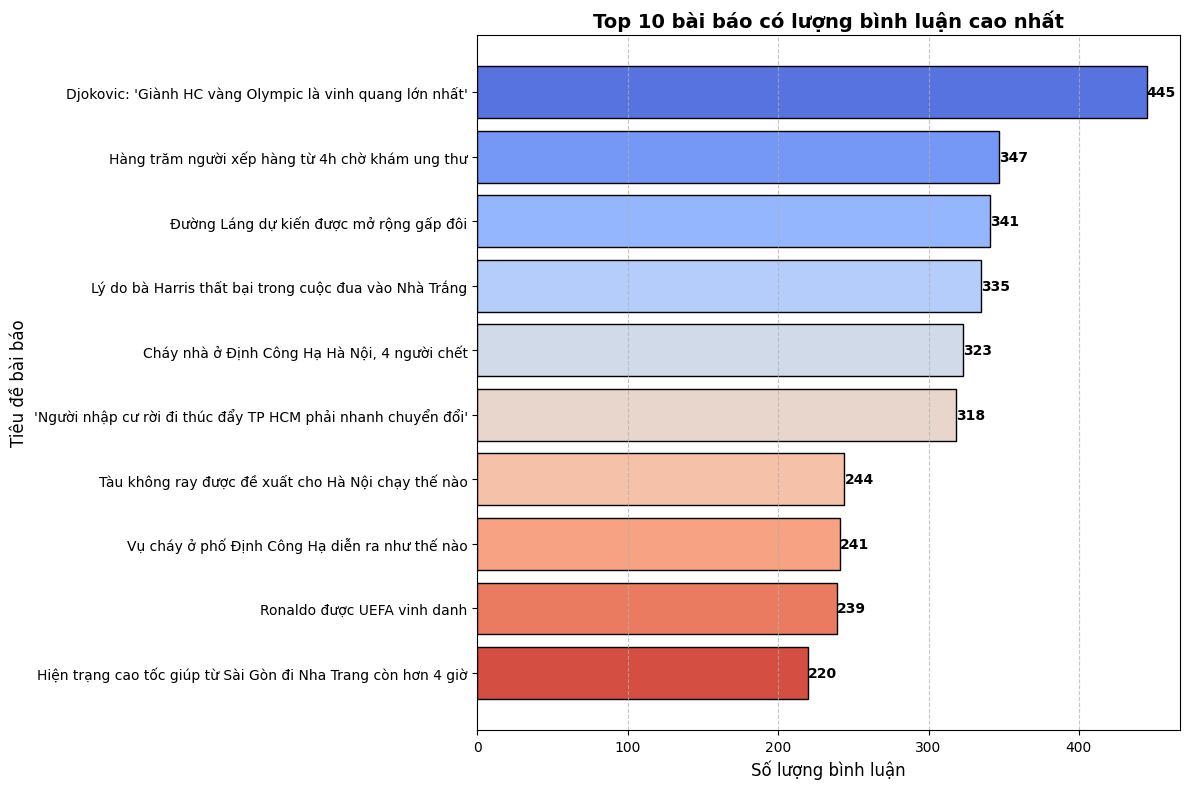

In [45]:
# Lọc 10 bài báo có lượng comment cao nhất
top_articles = df.nlargest(10, 'Comment Count')

# Thiết lập bảng màu
colors = sns.color_palette("coolwarm", len(top_articles))

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
bars = plt.barh(
    top_articles['Title'], 
    top_articles['Comment Count'], 
    color=colors, 
    edgecolor='black'
)

# Thêm giá trị trên thanh
for bar in bars:
    plt.text(
        bar.get_width() + 0.1, 
        bar.get_y() + bar.get_height() / 2, 
        f'{int(bar.get_width())}', 
        va='center', 
        fontsize=10, 
        fontweight='bold', 
        color='black'
    )

# Tùy chỉnh trục và tiêu đề
plt.xlabel('Số lượng bình luận', fontsize=12)
plt.ylabel('Tiêu đề bài báo', fontsize=12)
plt.title('Top 10 bài báo có lượng bình luận cao nhất', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Đảo ngược trục Y
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Thêm đường lưới trục X
plt.tight_layout()
plt.show()

In [46]:
df['Comment Count'].unique()

array([  0,   1,   3,   7,   9,  50,  99,  90,  12,  76,   5,  14,  17,
        20,  32, 115,  29, 100,  41,   2,   8, 216,   4,  94,  95,  39,
       125,  16,  19,  15, 116,  44,  60, 123,  30, 341,  10, 134, 168,
        81,  83,  28,  18, 151,  13,  31,   6, 347,  85, 318, 335,  52,
        61,  21,  25, 150,  11,  40,  72,  88,  38,  51,  87,  55,  34,
       189,  56,  33,  26,  24, 130, 104,  84, 111,  27,  93, 202,  64,
        37, 244,  82,  45,  23,  49,  57, 170, 169, 149,  48,  80,  58,
        65, 161, 239, 139,  54,  63,  70, 131, 143, 141,  47,  43, 152,
        35, 180, 159,  53, 138, 241, 110,  59, 172,  74,  22, 119, 107,
       193,  98,  66,  36,  42, 120, 183, 323,  86,  73,  79, 135, 165,
       220,  89, 445, 128, 176, 102])

In [47]:
max_comments = df['Comment Count'].max()
print(f"Số bình luận cao nhất: {max_comments}")


Số bình luận cao nhất: 445
